# Task 3

Group 11: Michael Hüppe, Leon Korkmaz

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform
import skimage

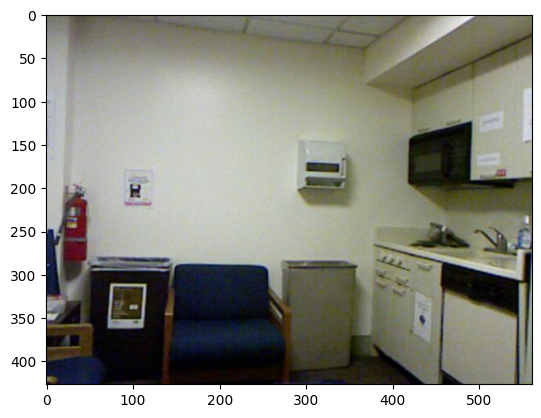

In [6]:
image_path = '0001_rgb.png'
rgb_img = io.imread(image_path)
plt.imshow(rgb_img)
plt.show()

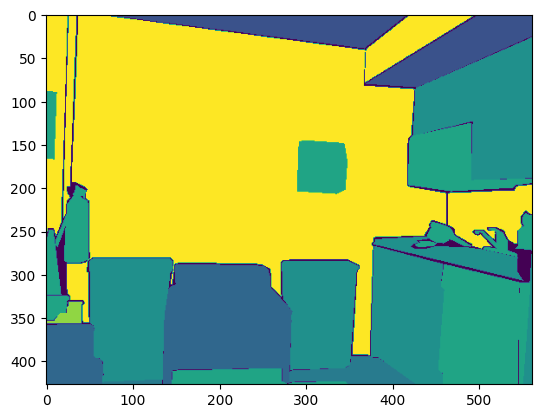

In [8]:
label_path = '0001_label.png'
label_img = io.imread(label_path)
plt.imshow(label_img)
plt.show()

8

### Slic Algorithm

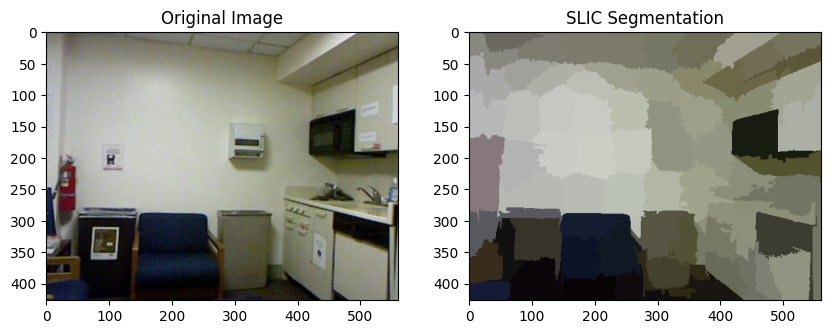

In [51]:
n_segments = 80
compactness = 10
segmentation = skimage.segmentation.slic(rgb_img, n_segments, compactness)

# Visualize the segmentation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(rgb_img)
plt.subplot(1, 2, 2)
plt.title("SLIC Segmentation")
plt.imshow(color.label2rgb(segmentation, rgb_img, kind='avg'))
plt.show()

In [69]:
# Step 3: Compute Undersegmentation Error
unique_labels = np.unique(label_img)
unique_labels = unique_labels[unique_labels != 0]  # Exclude unlabeled regions if necessary

errors = []
segment_error = {
    u: [] for u in unique_labels
}
segment_error["avg"] = []
for n in range(10, 1000, 5):
    segmentation = skimage.segmentation.slic(rgb_img, n, compactness)

    for label in unique_labels:
        gt_mask = (label_img == label)
        overlapping_segments = np.unique(segmentation[gt_mask])
        area_gt = np.sum(gt_mask)

        area_overlap = sum(np.sum(segmentation == seg) for seg in overlapping_segments)
        ue = (area_overlap - area_gt) / area_gt
        errors.append(ue)
        segment_error[label].append(ue)
    # Step 4: Average Undersegmentation Error
    average_ue = np.mean(errors)
    segment_error["avg"].append(average_ue)
    print(f"Average Undersegmentation Error: {average_ue:.4f}")

Average Undersegmentation Error: 13.1164
Average Undersegmentation Error: 13.9028
Average Undersegmentation Error: 13.9908
Average Undersegmentation Error: 12.3224
Average Undersegmentation Error: 11.5142
Average Undersegmentation Error: 11.2957
Average Undersegmentation Error: 11.1637
Average Undersegmentation Error: 10.7609
Average Undersegmentation Error: 10.0874
Average Undersegmentation Error: 9.9640
Average Undersegmentation Error: 9.5641
Average Undersegmentation Error: 9.3054
Average Undersegmentation Error: 8.8672
Average Undersegmentation Error: 8.5555
Average Undersegmentation Error: 8.2242
Average Undersegmentation Error: 7.9347
Average Undersegmentation Error: 7.6442
Average Undersegmentation Error: 7.3263
Average Undersegmentation Error: 7.0877
Average Undersegmentation Error: 6.8885
Average Undersegmentation Error: 6.6868
Average Undersegmentation Error: 6.5065
Average Undersegmentation Error: 6.3323
Average Undersegmentation Error: 6.1444
Average Undersegmentation Error

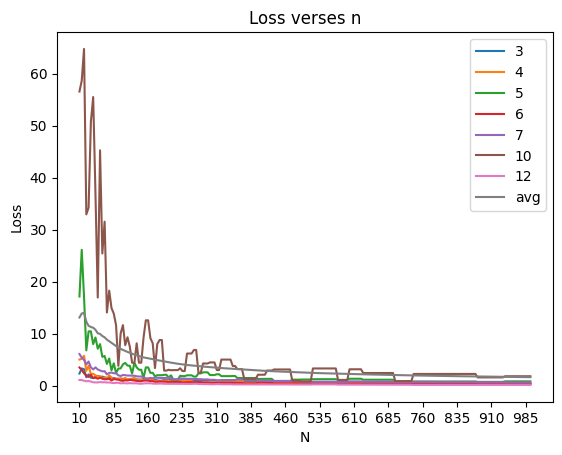

In [77]:
for s, l in segment_error.items():
    plt.plot(l, label=s)
plt.xticks([i for i in range(len(range(10, 1000, 5)))][::15], [f"{i}" for i in range(10, 1000, 5)][::15])
plt.title("Loss verses n")
plt.xlabel("N")
plt.ylabel("Loss")
plt.legend()
plt.show()

Increasing n_segments generally reduces the average undersegmentation error because the segments become smaller and align more closely with ground truth. This can be definetly seen in the decreasing error for all segments. The average is also consistently decreasing.

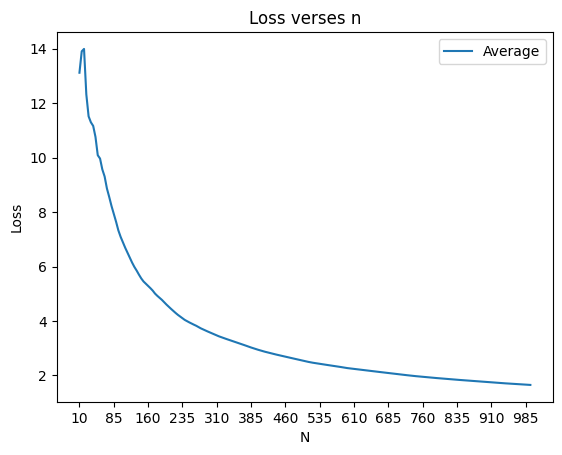

In [76]:
plt.plot(segment_error["avg"], label="Average")
plt.xticks([i for i in range(len(range(10, 1000, 5)))][::15], [f"{i}" for i in range(10, 1000, 5)][::15])
plt.title("Loss verses n")
plt.xlabel("N")
plt.ylabel("Loss")
plt.legend()
plt.show()

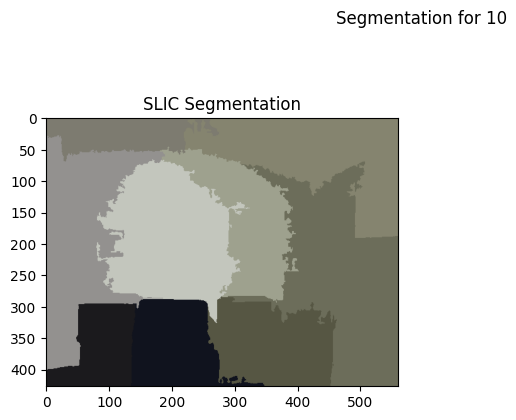

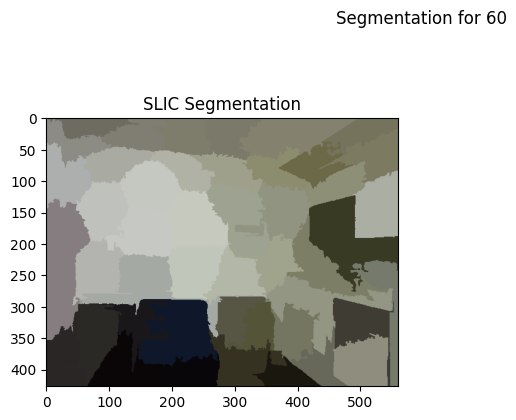

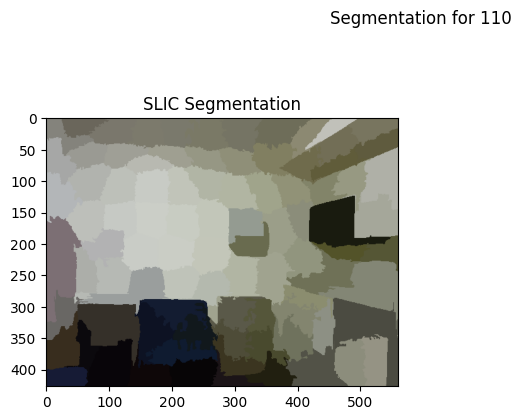

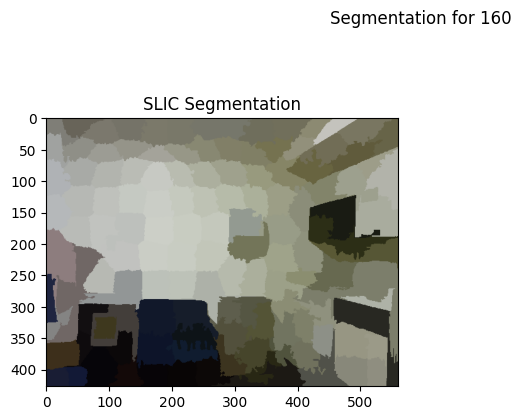

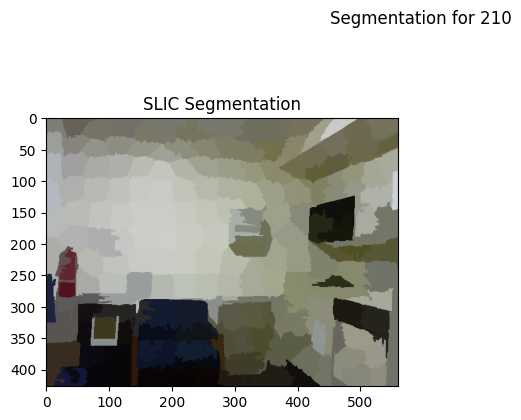

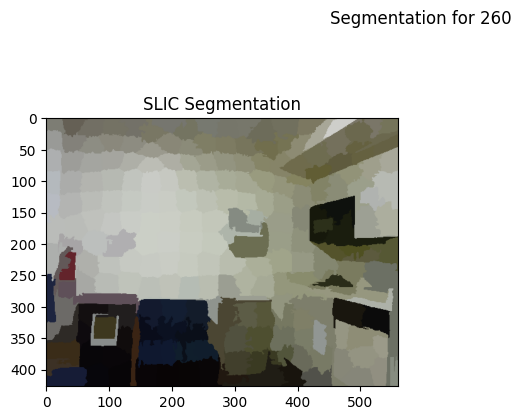

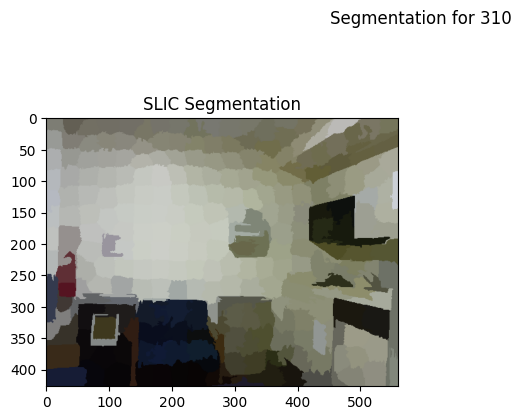

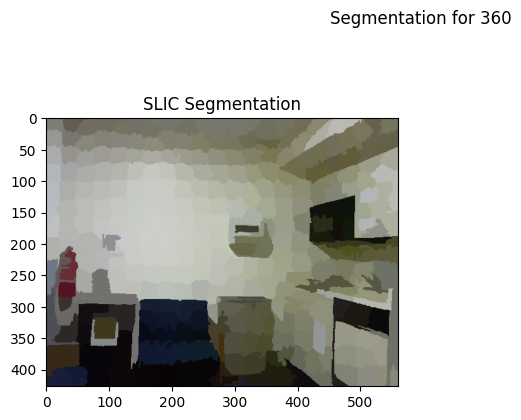

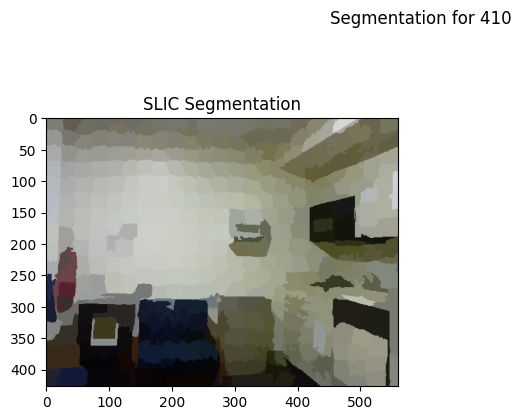

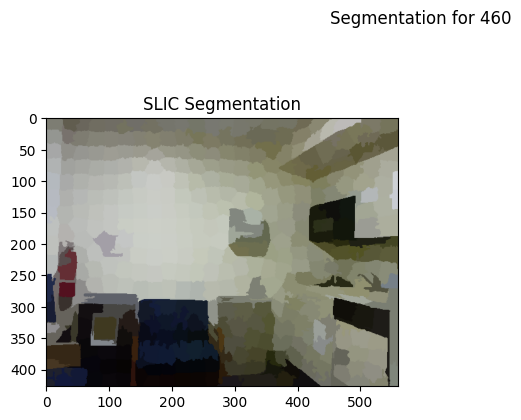

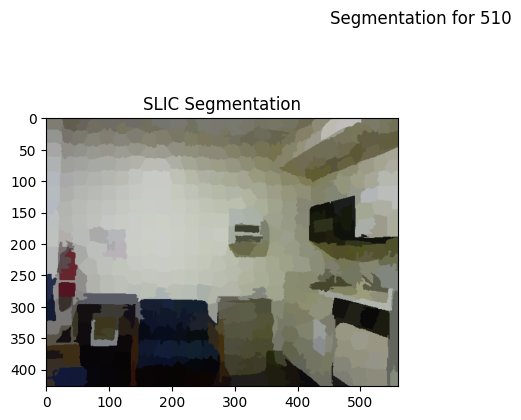

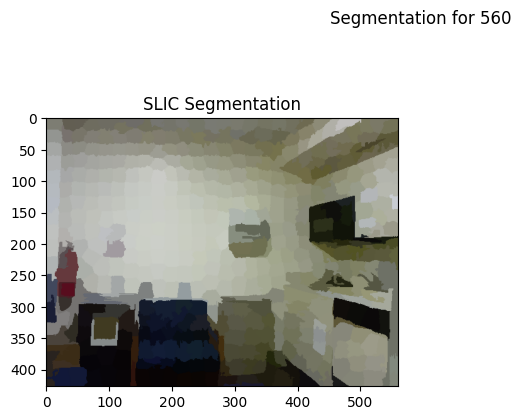

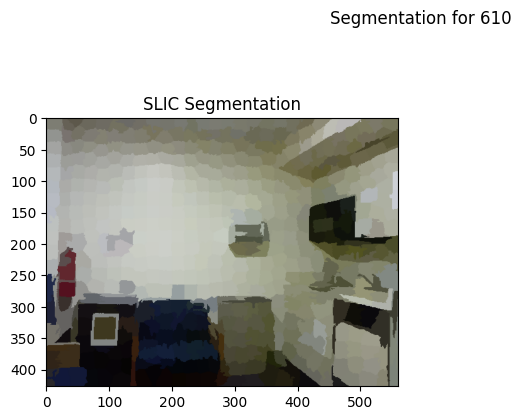

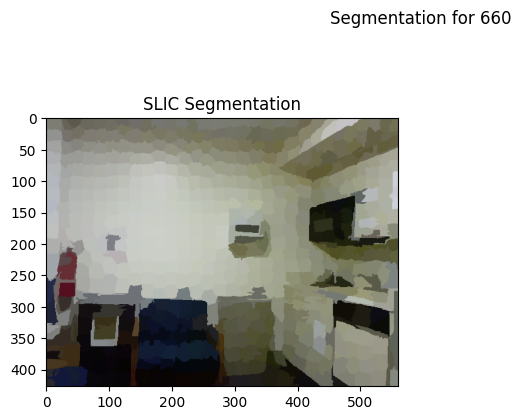

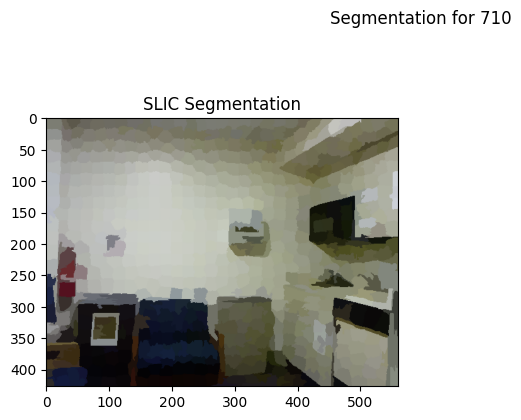

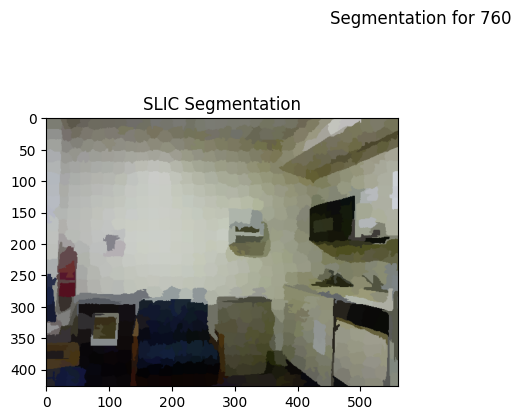

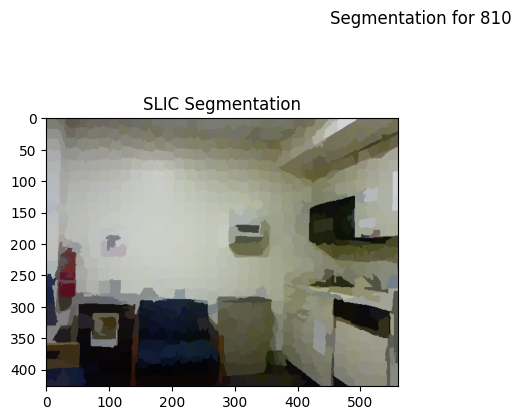

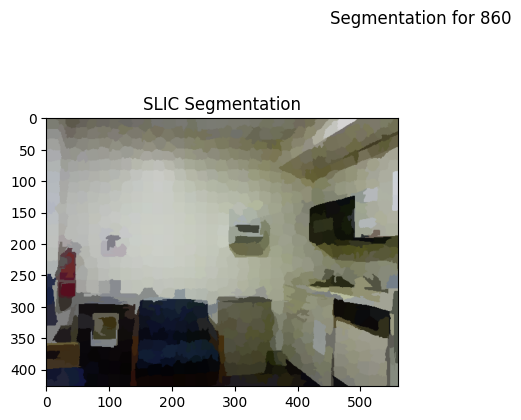

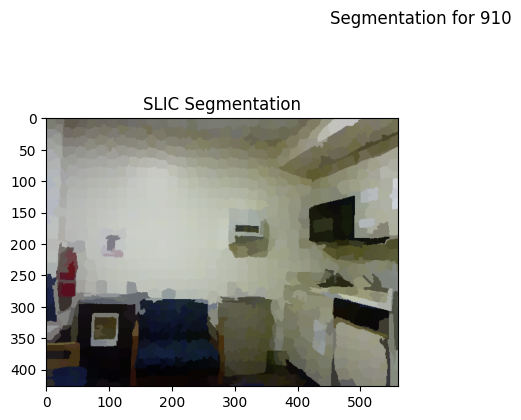

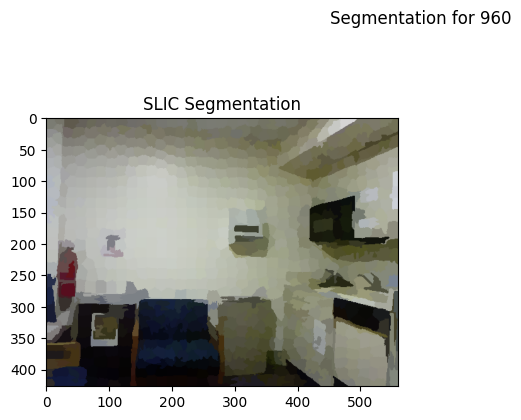

In [78]:
n_segments = 80
compactness = 10
for n in range(10, 1000, 50):
    segmentation = skimage.segmentation.slic(rgb_img, n, compactness)

    # Visualize the segmentation
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Segmentation for {n}")
    plt.subplot(1, 2, 1)
    plt.title("SLIC Segmentation")
    plt.imshow(color.label2rgb(segmentation, rgb_img, kind='avg'))
    plt.show()